In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as scy

In [2]:
N = 5096 # Tamanho do sinal
M0 = 128 # Size of the blocks
blocks = int(np.floor(N/M0)) # Number of blocks

n = np.linspace(0,N-1,N)
x = np.cos(2*np.pi*n/21)
noise = 0.2*(-1)**n

r = x + noise # Signal with noise
h = 0.5*scy.unit_impulse(2) + 0.5*scy.unit_impulse(2,1)


y = np.zeros((blocks + 1, M0))
for i in range(blocks):
    y[i,:] = r[i*M0:(i+1)*M0]

for i in range(N % M0):
    y[blocks, i] = r[blocks*M0+i]

convolution = np.zeros((blocks+1, M0 + len(h) - 1))
for i in range(y.shape[0]):
    convolution[i,:] = np.convolve(y[i,:], h) # Convolve the signals

result = np.zeros(convolution.size)
for i in range(convolution.shape[0]):
    result[i*M0: i*M0+convolution.shape[1]] += convolution[i,:] # Apply overlapp-add


(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5]),
 [Text(0, -1.5, '−1.5'),
  Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0'),
  Text(0, 1.5, '1.5')])

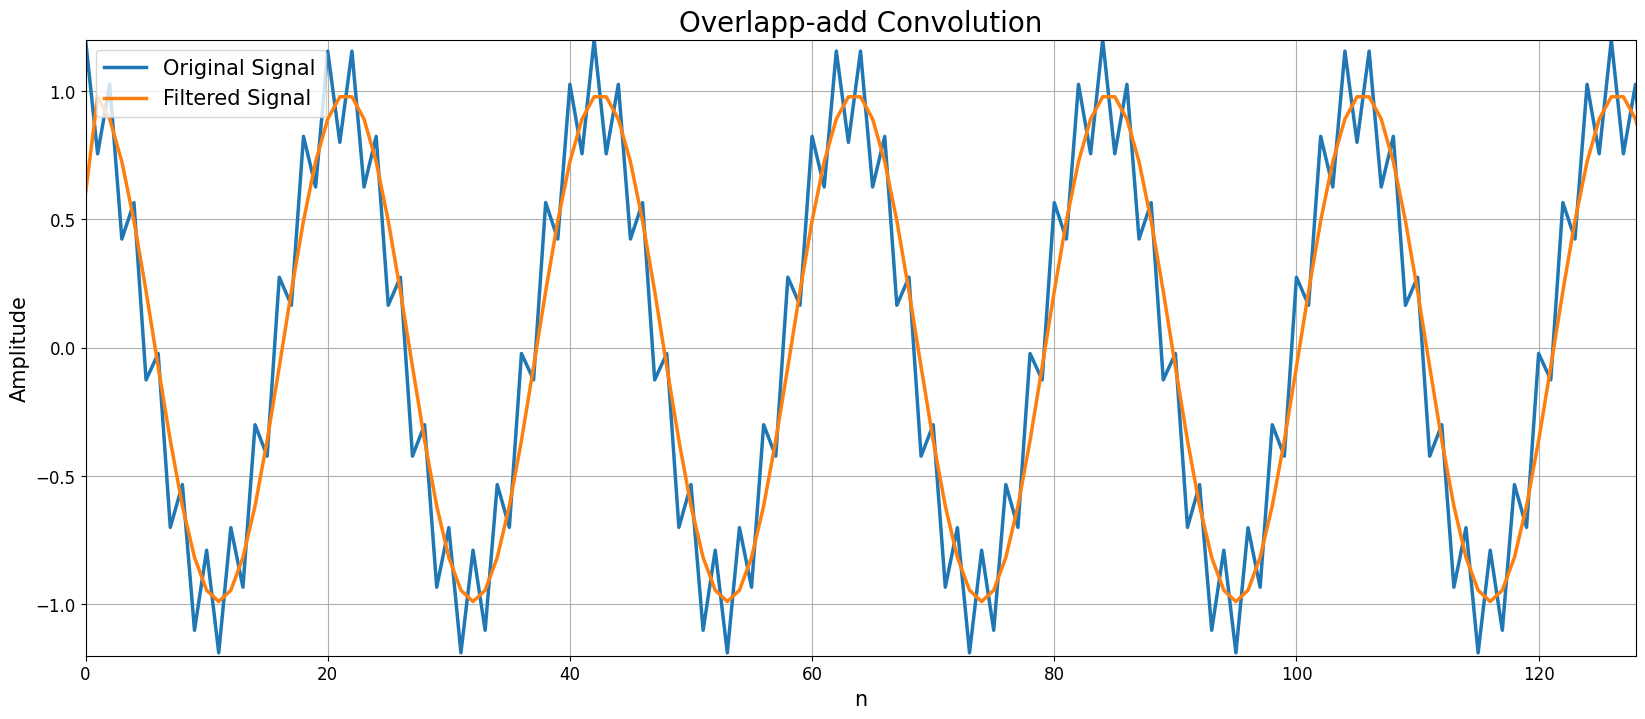

In [7]:
figure = plt.figure(figsize = (20, 8))

plt.plot(n, r, label = 'Original Signal', linewidth = 2.5)
plt.plot(np.arange(result.size), result, label = 'Filtered Signal ', linewidth = 2.5)

plt.grid()
plt.legend(fontsize = 15)
plt.xlim([0, 128])
plt.ylim([-1.2, 1.2])
plt.ylabel('Amplitude', size = 15)
plt.xlabel('n', size = 15)
plt.title('Overlapp-add Convolution', size = 20)
plt.xticks(size = 12)
plt.yticks(size = 12)